In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap, shiftgrid
from matplotlib.backends import backend_agg as agg # raster backend
from pylab import rcParams

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets # interactive controls in browser
%matplotlib inline
rcParams['figure.figsize'] = 8,8

In [3]:
# Dummy data
tweets_time= np.arange('2015-12-31T00Z', '2016-01-02T00Z', 30, dtype='datetime64[s]') #YYMMDD T00z == midnight, [s] is seconds
tweets = np.random.rand(len(tweets_time),2)
tweets_lon = tweets[:,0]*180-90
tweets_lat = tweets[:,0]*360-180
tweets=np.array([tweets_lat,tweets_lon,tweets_time]).transpose() #transpose data to get correct format

tweets

array([[-40.1660339432934, -20.0830169716467,
        datetime.datetime(2015, 12, 31, 0, 0)],
       [86.9004569724624, 43.4502284862312,
        datetime.datetime(2015, 12, 31, 0, 0, 30)],
       [128.3305278698599, 64.16526393492995,
        datetime.datetime(2015, 12, 31, 0, 1)],
       ..., 
       [60.658426676009896, 30.329213338004948,
        datetime.datetime(2016, 1, 1, 23, 58, 30)],
       [66.26418558445465, 33.132092792227326,
        datetime.datetime(2016, 1, 1, 23, 59)],
       [-157.63886331586303, -78.81943165793152,
        datetime.datetime(2016, 1, 1, 23, 59, 30)]], dtype=object)

In [20]:
# Spinning globe code

# Set up the data
data = tweets
t_lat = data[:,0] 
t_lon = data[:,1]
time = data[:,2]
datebins=856


In [21]:
tweets_new = np.genfromtxt('../data/UK_tweets_ny2016_xy.csv',delimiter=',')

In [22]:
def globe_tweet(rot=0,time=0):
    m = Basemap(projection='ortho', lon_0=rot, lat_0=20, resolution='c')
    m.shadedrelief(scale=0.1)
    m.drawcoastlines(color='0.4')
    m.drawcountries(color='0.4')
    m.fillcontinents(color='white',lake_color='gray')
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(0., 360., 60.))
    m.drawmapboundary(fill_color='0.8')

    lon=tweets_new[0:time,0]
    lat=tweets_new[0:time,1]

    x,y=m(lon,lat)
    m.plot(x,y,'bo',markersize=9)
    plt.show()

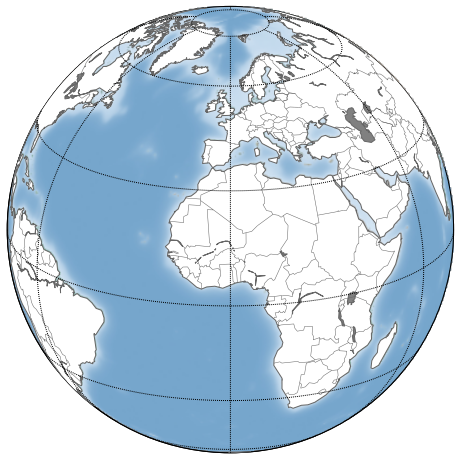

<function __main__.globe_tweet>

In [23]:
interact(globe_tweet,rot=(-180,180,45),time=(0,datebins,10))

In [24]:
def globe_tweet_subset(rot=0,time=0):
    m = Basemap(projection='ortho', lon_0=rot, lat_0=20, resolution='c',
                  llcrnrlon=-11,llcrnrlat=49)
    m.shadedrelief(scale=0.1)
    m.drawcoastlines(color='0.4')
    m.drawcountries(color='0.4')
    m.fillcontinents(color='white',lake_color='gray')
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(0., 360., 60.))
    m.drawmapboundary(fill_color='0.8')

    lon=tweets_new[0:time,0]
    lat=tweets_new[0:time,1]

    x,y=m(lon,lat)
    m.plot(x,y,'bo',markersize=9)
    plt.show()

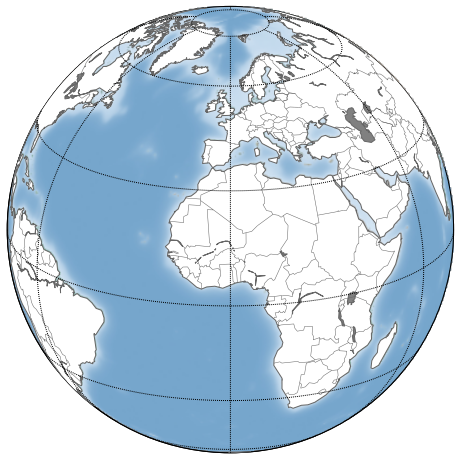

In [19]:
interact(globe_tweet_subset,rot=(-180,180,45),time=(0,856,10))